In [3]:
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pathlib import Path
import os

#Open CSV file
dir = Path().resolve()
file = 'all_data_1.csv'
df = pd.read_csv(file)

In [66]:
#Creates a dataframe with cols: name, distance, moving_time, type, start_date, 
#average_speed, max_speed, has_heartrate, average_heartrate and max_heartrate
df1 = df.iloc[:,[1,2,3,6,12,36,37,38,39,40]]

#converts moving time from seconds to minutes (ish)
df1.iloc[:,2] = df1.iloc[:,2].div(60).round(2)

#Break date into start time and date
df1['start_date_local'] = pd.to_datetime(df1['start_date_local'])
df1['start_time'] = df1['start_date_local'].dt.time
df1['start_date_local'] = df1['start_date_local'].dt.date
df1_run = df1


C:\Users\Liam_Statham\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Liam_Statham\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Liam_Statham\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying t

In [67]:
#Selects rows with type Run and then creates a new dataframe with that data
df1_run = df1['type']=='Run'
dfr = df1[df1_run]
dfr

,name,distance,moving_time,type,start_date_local,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate,start_time
0,"🌧 Lunch Run - stress reliever, 5.10km on watch...",4984.2,24.23,Run,2021-01-14,3.428,4.4,True,151.6,169.0,12:19:22
5,"⛅ Lunch Run - faster each km, but still steady",5042.0,24.12,Run,2021-01-12,3.477,4.8,True,152.3,164.0,12:11:47
10,"⛅ Morning Run - z2 long and slow, had to stop ...",20135.0,108.75,Run,2021-01-10,3.086,6.3,True,134.4,177.0,10:18:12
14,"🌫️ Lunch Run - weirdly, was far too warm z2",5056.4,24.23,Run,2021-01-07,3.478,5.2,True,124.6,149.0,12:27:28
17,⛅ Lunch Run - easy lunch 5k,5106.5,24.87,Run,2021-01-05,3.423,4.5,True,167.6,182.0,12:26:59
...,...,...,...,...,...,...,...,...,...,...,...
771,Afternoon Run,5241.6,27.23,Run,2014-01-15,3.208,6.1,False,NaN,NaN,16:14:15
772,Afternoon Run,5204.2,21.50,Run,2014-01-08,4.034,9.9,False,NaN,NaN,16:15:13
773,Afternoon Run,5213.6,23.25,Run,2014-01-07,3.737,6.6,False,NaN,NaN,16:35:21
778,Failure,3866.5,16.93,Run,2013-06-04,3.806,7.2,False,NaN,NaN,17:34:19


C:\Users\Liam_Statham\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


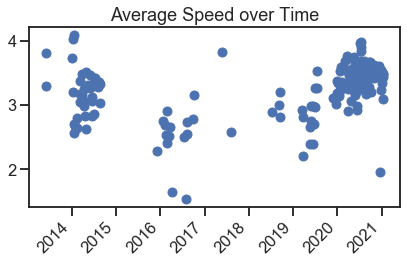

In [68]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = np.asarray(dfr.start_date_local)
y = np.asarray(dfr.average_speed)
ax1.plot_date(x, y)
ax1.set_title('Average Speed over Time')


#format the figure and display
fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

Text(0.5, 1.0, 'Average Speed vs Distance')

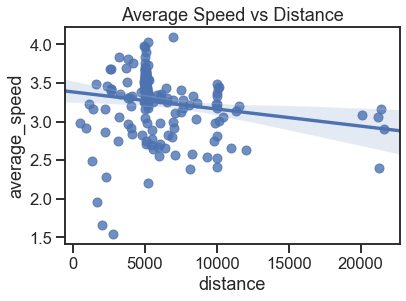

In [51]:
sns.set(style="ticks", context="talk")
sns.regplot(x='distance', y = 'average_speed', data = dfr).set_title("Average Speed vs Distance")

In [64]:
dfr[start_date_local] > '2018'

NameError: name 'start_date_local' is not defined

In [108]:
#fiter dates to after 2018, by creating a new column as a boolean, and using a new variable, converting it to datetime to work against
fitdate= '2020-01-01' 
fitdate = datetime.strptime(fitdate, '%Y-%m-%d').date()
dfr['dateidea'] = np.where(dfr['start_date_local'] > fitdate, 'true', 'false')

C:\Users\Liam_Statham\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [109]:
recr = dfr.loc[dfr['dateidea']=='true']
recr

,name,distance,moving_time,type,start_date_local,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate,start_time,dateidea
0,"🌧 Lunch Run - stress reliever, 5.10km on watch...",4984.2,24.23,Run,2021-01-14,3.428,4.4,True,151.6,169.0,12:19:22,true
5,"⛅ Lunch Run - faster each km, but still steady",5042.0,24.12,Run,2021-01-12,3.477,4.8,True,152.3,164.0,12:11:47,true
10,"⛅ Morning Run - z2 long and slow, had to stop ...",20135.0,108.75,Run,2021-01-10,3.086,6.3,True,134.4,177.0,10:18:12,true
14,"🌫️ Lunch Run - weirdly, was far too warm z2",5056.4,24.23,Run,2021-01-07,3.478,5.2,True,124.6,149.0,12:27:28,true
17,⛅ Lunch Run - easy lunch 5k,5106.5,24.87,Run,2021-01-05,3.423,4.5,True,167.6,182.0,12:26:59,true
...,...,...,...,...,...,...,...,...,...,...,...,...
452,"☁️ Morning Run - steady with a sore leg, happy...",5112.7,24.15,Run,2020-01-26,3.528,6.4,True,121.4,132.0,07:11:53,true
463,"🌙 Morning Run 10.1k on watch, 9.9k on strava 🤨",9989.6,51.52,Run,2020-01-19,3.232,5.5,True,133.6,180.0,07:04:48,true
467,Tri 1 - Run 3.3m,5230.0,27.40,Run,2020-01-16,3.181,5.9,True,169.3,195.0,17:13:26,true
475,☁️ Morning Run - steady Sunday jog,11313.5,60.03,Run,2020-01-12,3.141,5.8,True,170.1,182.0,07:52:43,true


Text(0.5, 1.0, 'Average Speed vs Distance')

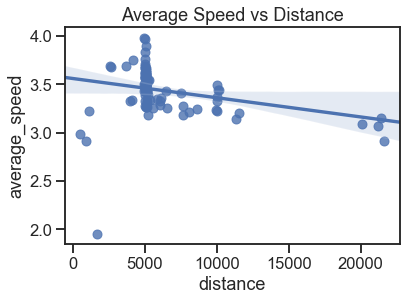

In [110]:
sns.set(style="ticks", context="talk")
sns.regplot(x='distance', y = 'average_speed', data = recr).set_title("Average Speed vs Distance")

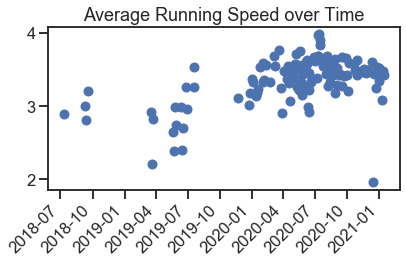

In [101]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = np.asarray(recr.start_date_local)
y = np.asarray(recr.average_speed)
ax1.plot_date(x, y)
ax1.set_title('Average Running Speed over Time')


#format the figure and display
fig.autofmt_xdate(rotation=45)
fig.tight_layout()